In [3]:
from rlmodule_3 import *
import matplotlib.pyplot as plt

In [4]:
#initialise important parameters
q = np.ones([4,70])
w = np.ones(70)*10
gamma = 1

In [5]:
#creating a function to run a finite episode
def run_finite_episode(q,w,alpha,gamma):
  #first state will be
  state = env.reset()
  is_done = False 
  I = 1
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    #sample an action using the policy
    action = sample_action(state,q)
    #take the action A, observe S', R
    new_state, reward, is_done, _ = env.step(action)
    if is_done == True:
      delta = reward + gamma*0 -v(w,state)
    else:
      delta = reward + gamma*v(w,new_state) -v(w,state)
    #defining some important parameters
    r_exp = reward + v(w,new_state)
    beta = r_exp - v(w,state)
    #now we will update the weight parameters
    #using adam-algorithm we will write the standard stochastic gradient descent as
    z_times_policy = 0
    prob_action = policy(state,q)
    for i in range(4):
      z_times_policy += prob_action[i]*z(state,i)
    z_ = z(state,action)
    z_times_policy = z_times_policy.transpose()
    z_ = z_.transpose()
    q += alpha*beta*(z_-z_times_policy)
    w += alpha*beta*y(state)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward



In [6]:
def run_episode_dont_update(q,w):
  state = env.reset()
  is_done = False
  #loop while S is not terminal for each time step
  no_step = 0
  total_reward = 0
  while no_step < 500 and is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    no_step += 1
    total_reward += reward
    state = new_state
  return no_step,total_reward

In [7]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

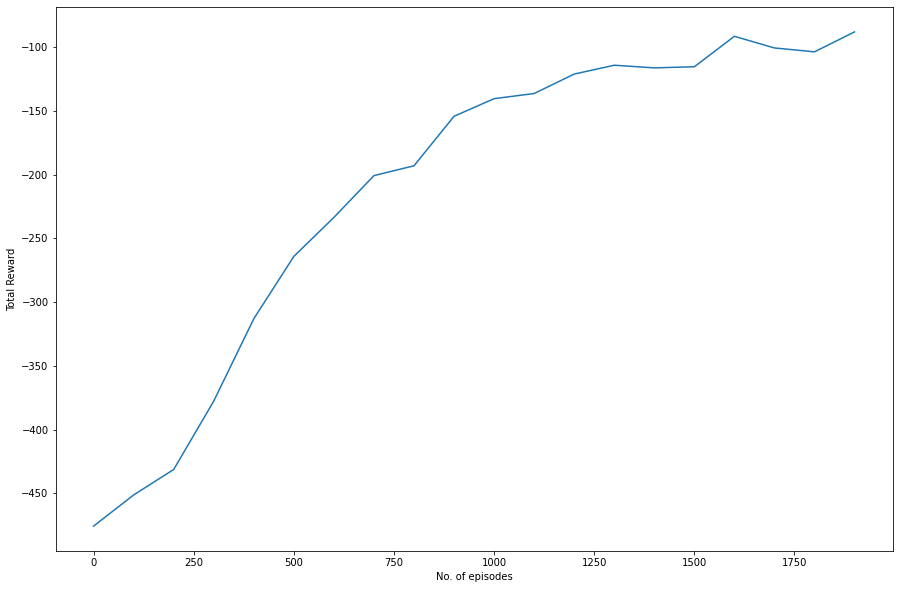

In [8]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [9]:
reward_tot[-1]

-88.10666666666667

In [10]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

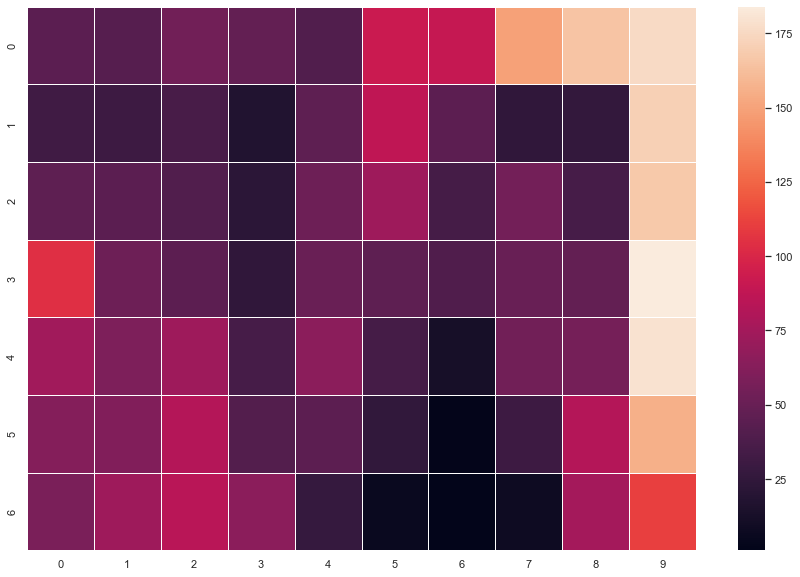

In [11]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [12]:
aa = reward_tot

In [13]:
#for first 2000 rounds of training
alpha = 0.01
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [14]:
aa.extend(reward_tot)

In [ ]:
print(aa)

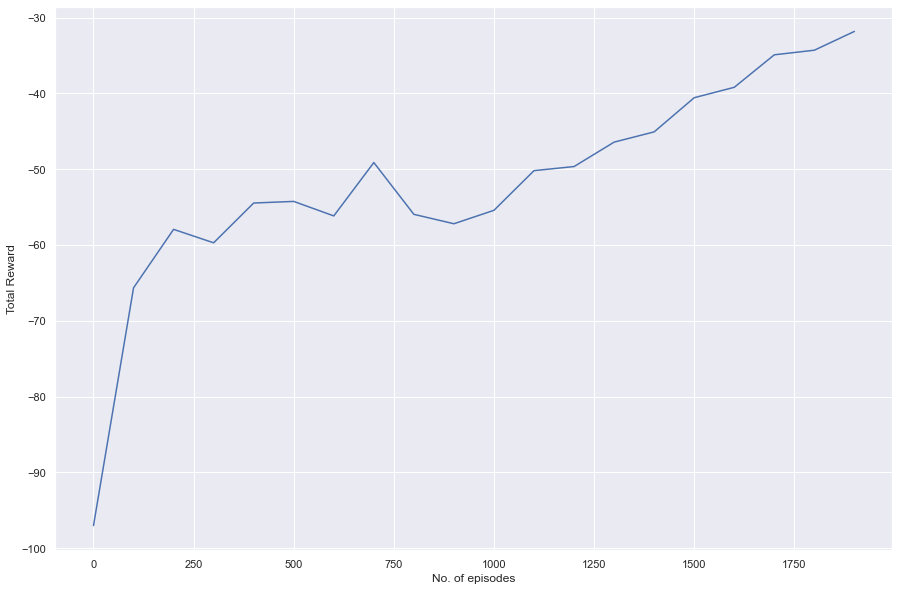

In [15]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [16]:
reward_tot[-1]

-31.833333333333332

In [17]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

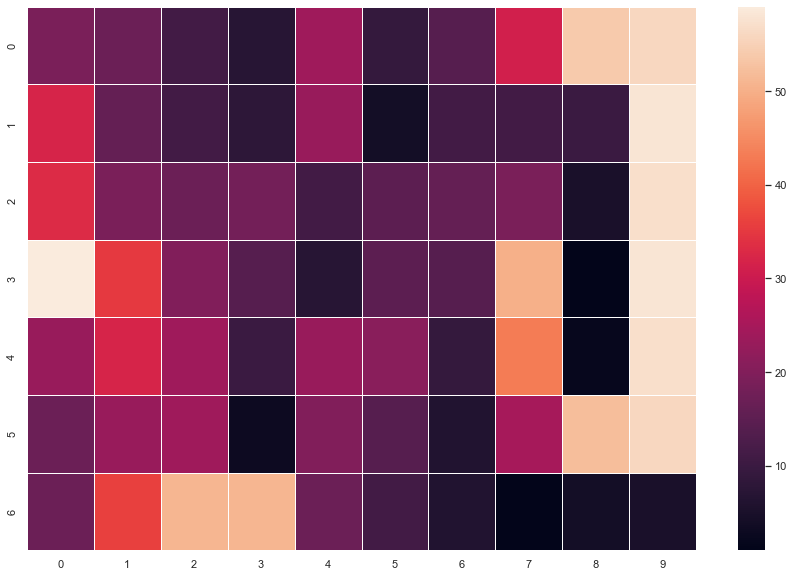

In [18]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [19]:
#for first 2000 rounds of training
alpha = 0.1
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_finite_episode(q,w,alpha,gamma)
  tot_episodes += 100

In [20]:
aa.extend(reward_tot)

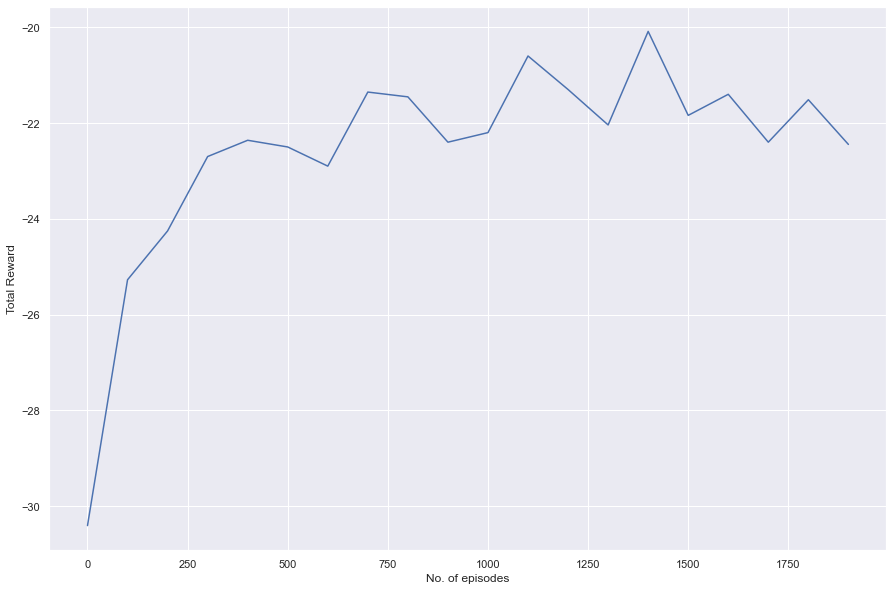

In [21]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [22]:
reward_tot[-1]

-22.446666666666665

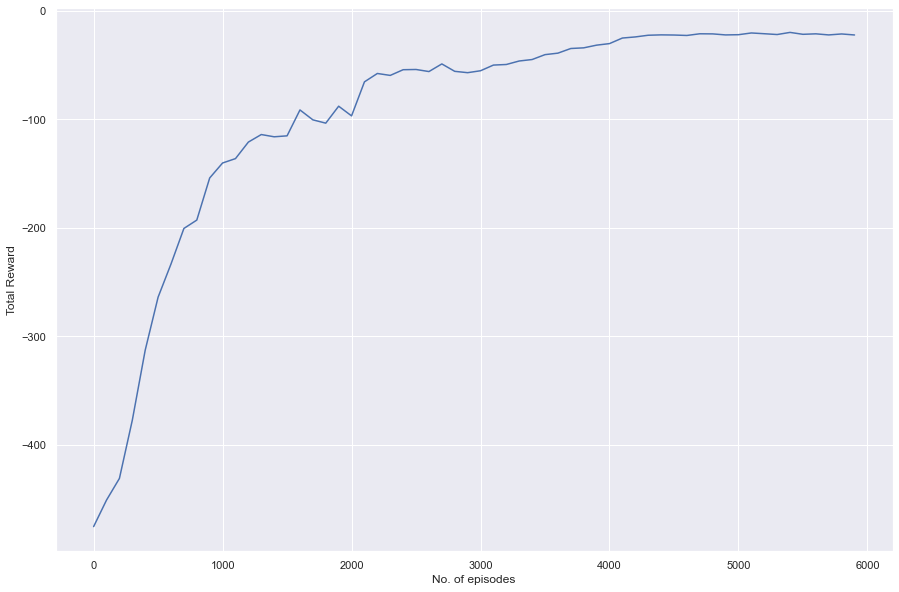

In [23]:
episodes_x = np.linspace(0,5900,60)
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(episodes_x,aa)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [24]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

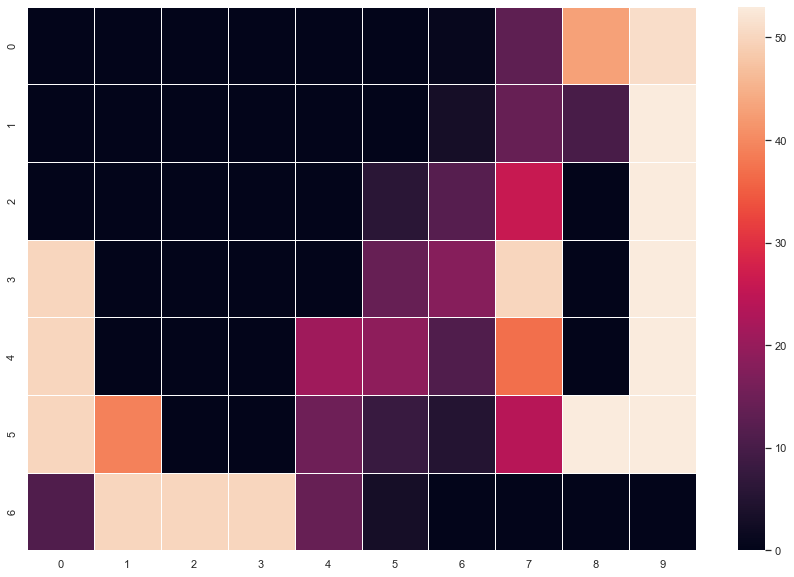

In [25]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [26]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
val = pd.DataFrame(value_grid)
val

,0,1,2,3,4,5,6,7,8,9
0,-15.151933,-14.507048,-13.911757,-13.461985,-12.819129,-8.380277,-5.316486,-3.191270,-2.570650,-1.758887
1,-15.359436,-14.470572,-13.736065,-13.329469,-12.067139,-7.512053,-4.648018,-3.136342,-1.921305,-0.920945
2,-14.583286,-13.473800,-12.728651,-12.590498,-11.627430,-6.062012,-4.178172,-3.138895,-2.878782,-0.086838
3,-12.153714,-11.506297,-11.335818,-11.927145,-9.291485,-5.553646,-4.031887,10.000000,0.086590,0.769145
4,-11.064871,-10.300541,-9.765616,-11.095242,-6.809972,-4.583263,2.145609,1.321172,0.251259,1.795759
5,-9.950727,-8.762537,-8.174412,-9.130193,-4.764109,-1.223040,0.289361,3.231014,3.856194,3.134337
6,-9.107380,-7.612966,-6.557203,-5.633831,-2.312374,1.628821,4.712231,6.233966,3.553558,2.658325


In [27]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(0)
    times_visited[0][0] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

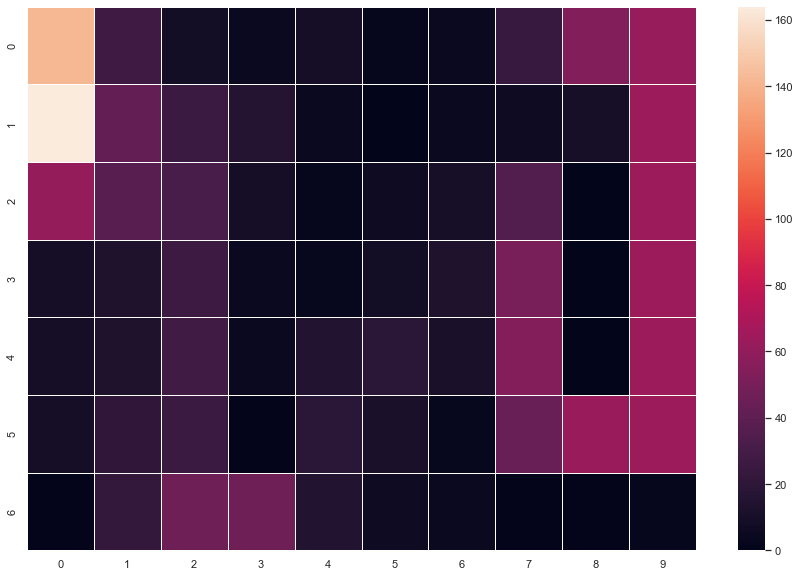

In [28]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [29]:
av_steps = Tot_steps/50
print(av_steps)

33.82


In [30]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(2)
    times_visited[6][0] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

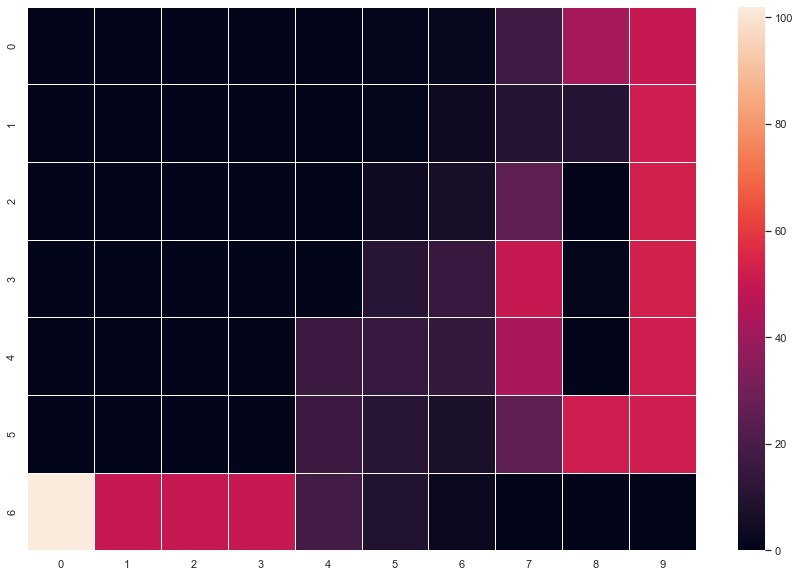

In [31]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [32]:
av_steps = Tot_steps/50
print(av_steps)

18.84


In [33]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(3):
        env.step(2)
        env.step(1)
    times_visited[6][3] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

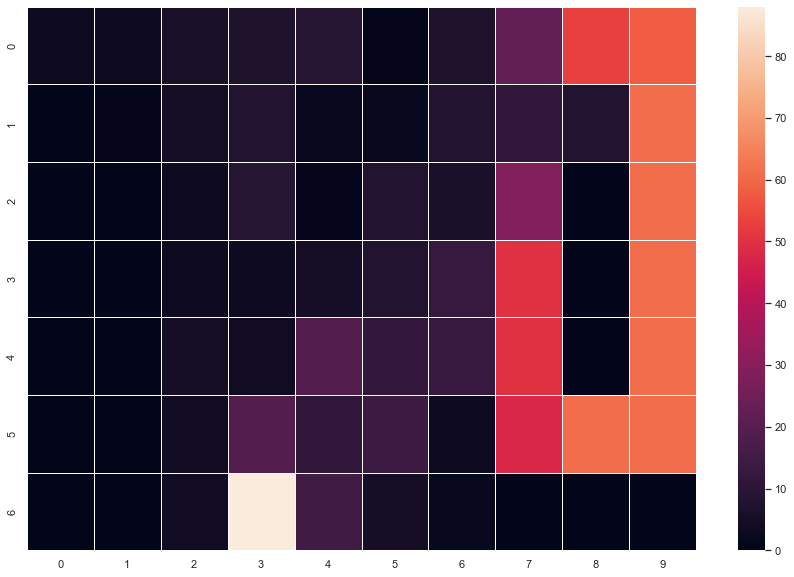

In [34]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [35]:
av_steps = Tot_steps/50
print(av_steps)

19.68


In [36]:
#let us check if the state can still work well when initialised in some random place
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
    state = env.reset()
    for ii in range(1):
        env.step(0)
        env.step(1)
    times_visited[3][2] += 1
    no_steps_this_loop = 0
    is_done = False
    while is_done == False:
        action = sample_action(state,q)
        new_state, reward, is_done, _ = env.step(action)
        state = new_state
        a,b = divmod(state,10)
        times_visited[a][b] += 1
        no_steps_this_loop +=1
        Tot_steps += 1
    no_steps.append(no_steps_this_loop)

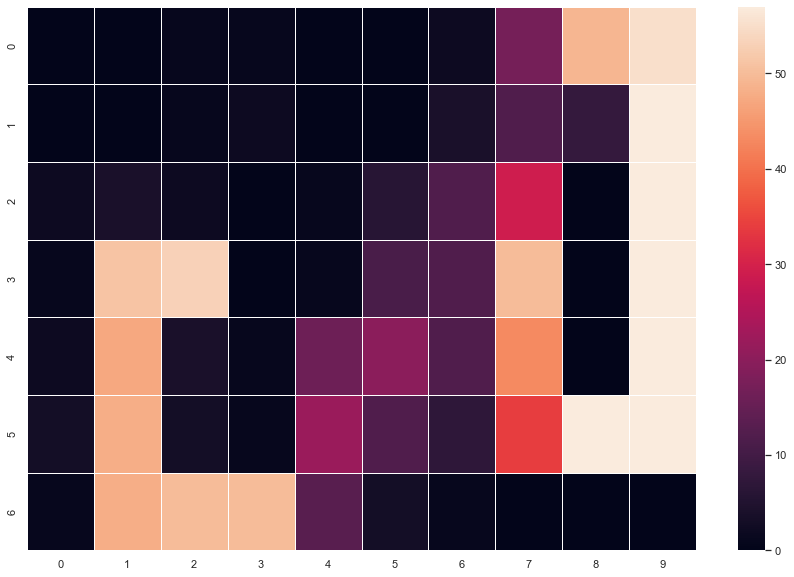

In [37]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [38]:
av_steps = Tot_steps/50
print(av_steps)

22.4
